In [1]:
import os
import numpy as np

In [2]:
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
import corner as dfm
import matplotlib.patches as mpatches
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# read GSWLC data: https://salims.pages.iu.edu/gswlc/#catalog-download
# data column details: https://salims.pages.iu.edu/gswlc/table2.pdf
fgswlc = os.path.join(os.environ['GALPOPFM_DIR'], 'obs', 'GSWLC-M2.dat')
gswlc = np.loadtxt(fgswlc, unpack=True)
#gswlc = np.loadtxt('/Users/tjitske/Downloads/GSWLC-M2.dat', unpack = True)

In [4]:
logm = gswlc[9]
logsfr = gswlc[11]
logssfr = logsfr-logm
Av = gswlc[17]

In [14]:
has_Av = (Av != -99.)
mlim = (logm > 9.)

cuts = has_Av & mlim

is_q = (logsfr < logm - 11.5)
is_sf = (logsfr > logm - 11.5)

(-4.2, 3.2)

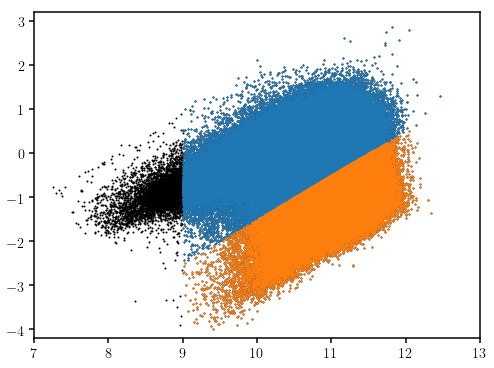

In [15]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(logm, logsfr, s=1, c='k')
sub.scatter(logm[cuts & is_sf], logsfr[cuts & is_sf], s=1)
sub.scatter(logm[cuts & is_q], logsfr[cuts & is_q], s=1)
sub.set_xlim(7, 13)
sub.set_ylim(-4.2, 3.2)

(0.0, 2.0)

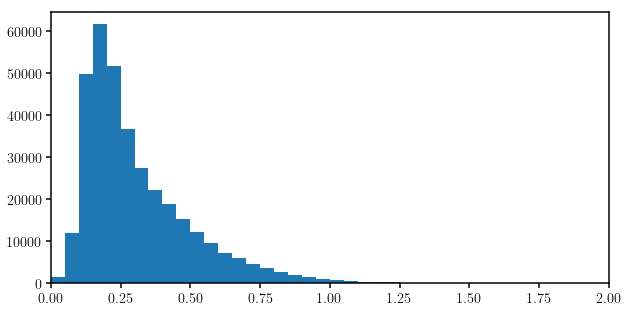

In [16]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.hist(Av[cuts], range=(0., 2.), bins=40)
sub.set_xlim(0., 2.)

(0, 2.0)

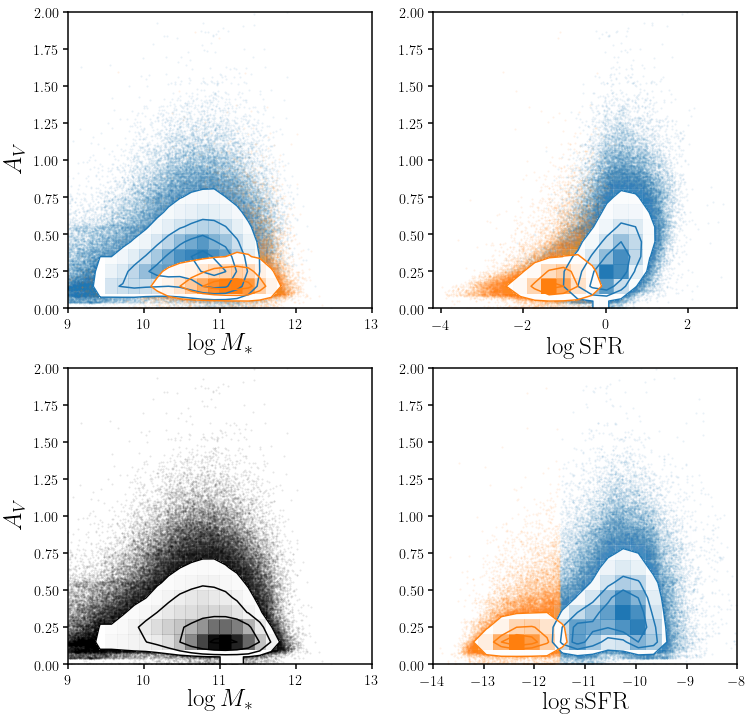

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
dfm.hist2d(logm[cuts & is_sf], Av[cuts & is_sf], range = [[9.5,12.5],[0,2]], ax = ax1, color = 'C0')
dfm.hist2d(logm[cuts & is_q], Av[cuts & is_q], range = [[9.5,12.5],[0,2]], ax = ax1, color = 'C1')
ax1.set_xlabel('$\log M_*$', fontsize=25)
ax1.set_xlim(9, 13)
ax1.set_ylabel('$A_V$', fontsize=25)
ax1.set_ylim(0, 2.)

dfm.hist2d(logsfr[cuts & is_sf], Av[cuts & is_sf], range = [[-4,3],[0,2]], ax = ax2, color = 'C0')
dfm.hist2d(logsfr[cuts & is_q], Av[cuts & is_q], range = [[-4,3],[0,2]], ax = ax2, color = 'C1')
ax2.set_xlabel(r'$\log {\rm SFR}$', fontsize=25)
ax2.set_xlim(-4.2, 3.2)
ax2.set_ylim(0, 2.)

dfm.hist2d(logm[cuts], Av[cuts], range = [[9.5,12.5],[0,2]], ax = ax3, color = 'k')
ax3.set_xlabel('$\log M_*$', fontsize=25)
ax3.set_xlim(9, 13)
ax3.set_ylabel('$A_V$', fontsize=25)
ax3.set_ylim(0, 2.)

dfm.hist2d(logssfr[cuts & is_sf], Av[cuts & is_sf], range = [[-14,-8],[0,2]], ax = ax4, color = 'C0')
dfm.hist2d(logssfr[cuts & is_q], Av[cuts & is_q], range = [[-14,-8],[0,2]], ax = ax4, color = 'C1')
ax4.set_xlabel(r'$\log {\rm sSFR}$', fontsize=25)
ax4.set_xlim(-14, -8)
ax4.set_ylim(0, 2.)

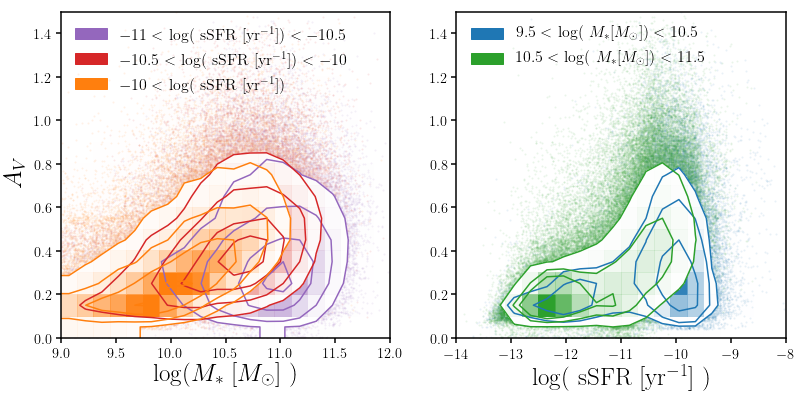

In [41]:
ssfrsel1 = (logssfr > -10)
ssfrsel2 = (logssfr > -10.5) & (logssfr < -10)
ssfrsel3 = (logssfr > -11) & (logssfr < -10.5)
msel1 = (logm > 11)
msel2 = (logm > 10.5) & (logm < 11.5)
msel3 = (logm > 9.5) & (logm < 10.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
dfm.hist2d(logm[cuts & ssfrsel3], Av[cuts & ssfrsel3], range = [[9.,12.],[0,2]], 
           ax = ax1, color = 'C4')
dfm.hist2d(logm[cuts & ssfrsel2], Av[cuts & ssfrsel2], range = [[9.,12.],[0,2]], 
           ax = ax1, color = 'C3')
dfm.hist2d(logm[cuts & ssfrsel1], Av[cuts & ssfrsel1], range = [[9.,12.],[0,2]], 
           ax = ax1, color = 'C1')
ax1.set_xlabel('$\log( M_*$ [$M_{\odot}$] )', fontsize=25)
ax1.set_xlim(9., 12.)
ax1.set_ylabel('$A_V$', fontsize=25)
ax1.set_ylim(0, 1.5)
dfm.hist2d(logssfr[cuts & msel3], Av[cuts & msel3], range = [[-14,-8],[0,2]], 
           ax = ax2, color = 'C0')
dfm.hist2d(logssfr[cuts & msel2], Av[cuts & msel2], range = [[-14,-8],[0,2]], 
           ax = ax2, color = 'C2')
#dfm.hist2d(logssfr[cuts & msel1], Av[cuts & msel1], range = [[-14,-8],[0,2]], 
#           ax = ax2, color = 'C5')
ax2.set_xlabel('$\log($ sSFR [yr$^{-1}$] )', fontsize=25)
ax2.set_xlim(-14, -8)
ax2.set_ylim(0, 1.5)

patch11 = mpatches.Patch(color='C4', label='$-11 <$ log( sSFR [yr$^{-1}] ) < -10.5$')
patch12 = mpatches.Patch(color='C3', label='$-10.5 <$ log( sSFR [yr$^{-1}] ) < -10$')
patch13 = mpatches.Patch(color='C1', label='$-10 <$ log( sSFR [yr$^{-1}] )$')
ax1.legend(handles=[patch11, patch12, patch13], fontsize = 16)
patch21 = mpatches.Patch(color='C0', label='$9.5 <$ log( $M_* [M_{\odot}] ) < 10.5$')
patch22 = mpatches.Patch(color='C2', label='$10.5 <$ log( $M_* [M_{\odot}] ) < 11.5$')
#patch23 = mpatches.Patch(color='C5', label='$11 <$ log( $M_* [M_{\odot}])$')
ax2.legend(handles=[patch21, patch22], fontsize = 16)
fig.savefig('../doc/paper/figs/gswlc_Av_mstar_ssfr_dependence.png')
fig.savefig('../doc/paper/figs/gswlc_Av_mstar_ssfr_dependence.pdf')